Importing the Dependencies

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import silhouette_score

Data Collection & Analysis

In [330]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('data/mall_Customers.csv')

In [331]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [332]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [333]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [334]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dropping CostumorID

In [335]:
customer_data = customer_data.drop('CustomerID', axis=1)

data_processed = customer_data.copy()

Encode categorical data (Gender)

In [336]:
encoder = OrdinalEncoder()
data_processed['Gender'] = encoder.fit_transform(data_processed[['Gender']])

Scale Numerical Data

In [337]:
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
data_processed[numerical_cols] = scaler.fit_transform(data_processed[numerical_cols])

data_processed.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,-1.424569,-1.738999,-0.434801
1,1.0,-1.281035,-1.738999,1.195704
2,0.0,-1.352802,-1.700830,-1.715913
3,0.0,-1.137502,-1.700830,1.040418
4,0.0,-0.563369,-1.662660,-0.395980


Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [338]:
X = data_processed.values

# finding wcss value for different number of clusters

wcss = []
silhouette_scores = []
k_range = range(2,11)

for k in k_range:
  kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans_model.fit(X)

  wcss.append(kmeans_model.inertia_)

  labels = kmeans_model.labels_
  score = silhouette_score(X, labels)
  silhouette_scores.append(score)

Plot results

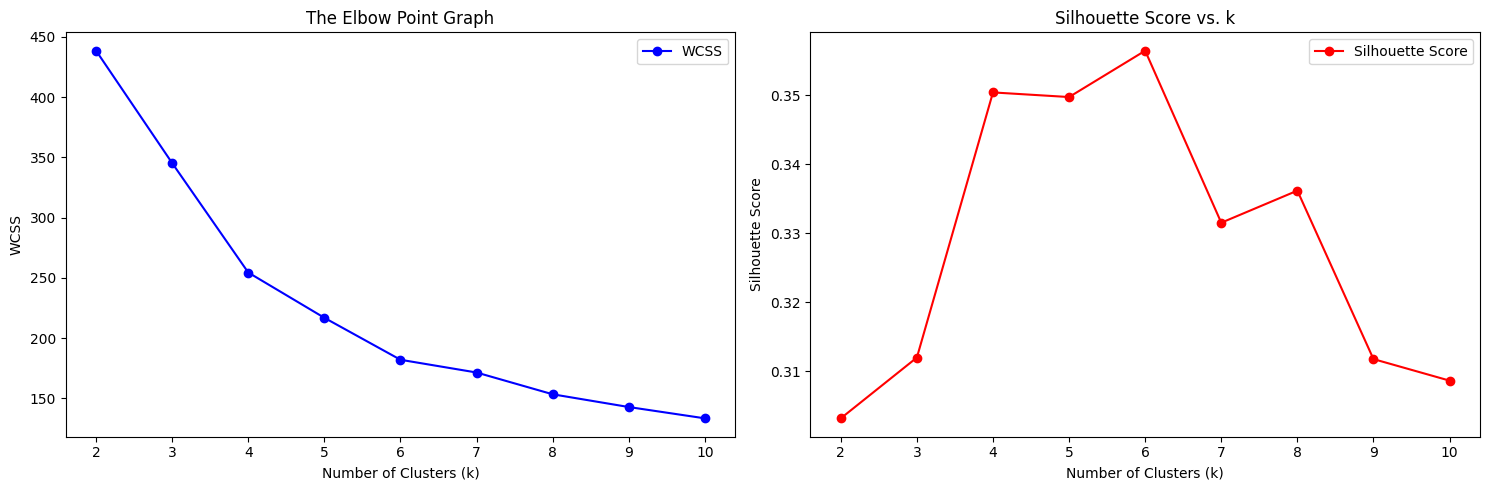

In [339]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot an elbow graph
ax1.plot(k_range, wcss, 'bo-', label='WCSS')
ax1.set_title("The Elbow Point Graph")
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS')
ax1.legend()

# Plot the silhouette scores
ax2.plot(k_range, silhouette_scores, 'ro-', label='Silhouette Score')
ax2.set_title('Silhouette Score vs. k')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.legend()

plt.tight_layout()
plt.show()

Conclusion on K

In [340]:
best_k = k_range[np.argmax(silhouette_scores)]
print (f'Optimal no. of clusters: {best_k}')
OPTIMAL_K = best_k

Optimal no. of clusters: 6


Training the k-Means Clustering Model

In [341]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
cluster_labels = kmeans.fit_predict(X)

print(cluster_labels)

customer_data['Cluster'] = cluster_labels

[1 1 1 1 1 1 2 1 0 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2
 1 2 1 0 1 2 1 2 1 2 1 1 1 2 1 1 0 2 2 2 0 1 0 0 1 0 2 0 1 2 0 1 1 0 2 0 0
 0 1 2 2 1 2 0 2 0 2 1 2 0 1 1 2 0 1 2 2 2 1 2 1 2 1 1 2 0 1 2 1 0 0 0 0 0
 1 2 1 1 1 0 2 2 2 1 2 2 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


Cluster Profiling

In [342]:
cluster_profiles = customer_data.groupby('Cluster').mean(numeric_only=True)
cluster_profiles['Customer_Count'] = customer_data['Cluster'].value_counts()

print(cluster_profiles)

               Age  Annual Income (k$)  Spending Score (1-100)  Customer_Count
Cluster                                                                       
0        63.461538           49.884615               44.923077              26
1        24.716981           40.018868               61.698113              53
2        45.454545           45.750000               38.431818              44
3        32.692308           86.538462               82.128205              39
4        40.394737           87.000000               18.631579              38


Advanced visualization

In [343]:
customer_data['Cluster_Label'] = "Cluster " + customer_data['Cluster'].astype(str)

fig = go.Figure()

for cluster_num in range(OPTIMAL_K):
    # Get data for this cluster
    cluster_data = customer_data[customer_data['Cluster'] == cluster_num]
    
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Annual Income (k$)'],
        y=cluster_data['Spending Score (1-100)'],
        z=cluster_data['Age'],
        mode='markers',
        marker=dict(size=4),
        name=f"Cluster {cluster_num}"
    ))

fig.update_layout(
    title=f"3D Cluster Visualization (k={OPTIMAL_K})",
    scene=dict(
        xaxis_title='Annual Income (k$)',
        yaxis_title='Spending Score (1-100)',
        zaxis_title='Age'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

/tmp/ipykernel_16316/2993257745.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Final Vizualization: Pairplot

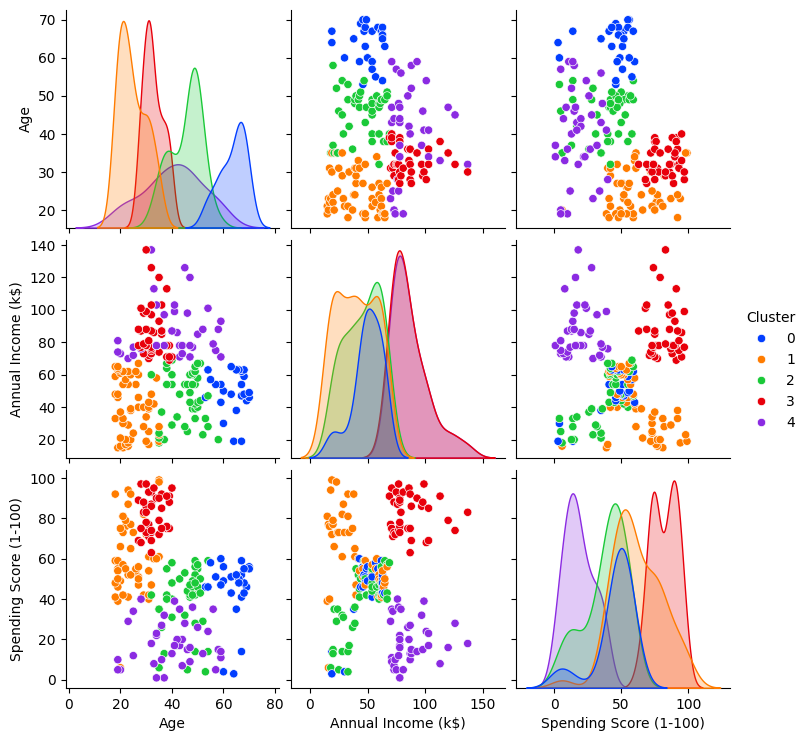

In [344]:
sns.pairplot(customer_data, hue='Cluster', palette='bright')
plt.show()